In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [2]:
df = pd.read_csv("AB_NYC_2019 CLEANING DATA.csv")

### 1.DATA INTEGRITY 

In [3]:
df.head()

id                                              name  host_id  \
0  2539                Clean & quiet apt home by the park     2787   
1  2595                             Skylit Midtown Castle     2845   
2  3647               THE VILLAGE OF HARLEM....NEW YORK !     4632   
3  3831                   Cozy Entire Floor of Brownstone     4869   
4  5022  Entire Apt: Spacious Studio/Loft by central park     7192   

     host_name neighbourhood_group neighbourhood  latitude  longitude  \
0         John            Brooklyn    Kensington  40.64749  -73.97237   
1     Jennifer           Manhattan       Midtown  40.75362  -73.98377   
2    Elisabeth           Manhattan        Harlem  40.80902  -73.94190   
3  LisaRoxanne            Brooklyn  Clinton Hill  40.68514  -73.95976   
4        Laura           Manhattan   East Harlem  40.79851  -73.94399   

         room_type  price  minimum_nights  number_of_reviews last_review  \
0     Private room    149               1                  9  2018-10-19   
1  Entire home/apt    225               1                 45  2019-05-21   
2     Private room    150               3                  0         NaN   
3  Entire home/apt     89               1                270  2019-07-05   
4  Entire home/apt     80              10                  9  2018-11-19   

   reviews_per_month  calculated_host_listings_count  availability_365  
0               0.21                               6               365  
1               0.38                               2               355  
2                NaN                               1               365  
3               4.64                               1               194  
4               0.10                               1                 0

The dataset consist of 48895 entries with 16 columns. 

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

###### UNIQUE VALUES CONTAINED IN THE DATASET 

In [5]:
# Iterate over each column and print unique values
for column in df.columns:
    unique_values = df[column].unique()
    print(f"Column: {column}")
    print(f"Unique Values ({len(unique_values)}): {unique_values[:5]}...") 
    print("-" * 50)


Column: id
Unique Values (48895): [2539 2595 3647 3831 5022]...
--------------------------------------------------
Column: name
Unique Values (47906): ['Clean & quiet apt home by the park' 'Skylit Midtown Castle'
 'THE VILLAGE OF HARLEM....NEW YORK !' 'Cozy Entire Floor of Brownstone'
 'Entire Apt: Spacious Studio/Loft by central park']...
--------------------------------------------------
Column: host_id
Unique Values (37457): [2787 2845 4632 4869 7192]...
--------------------------------------------------
Column: host_name
Unique Values (11453): ['John' 'Jennifer' 'Elisabeth' 'LisaRoxanne' 'Laura']...
--------------------------------------------------
Column: neighbourhood_group
Unique Values (5): ['Brooklyn' 'Manhattan' 'Queens' 'Staten Island' 'Bronx']...
--------------------------------------------------
Column: neighbourhood
Unique Values (221): ['Kensington' 'Midtown' 'Harlem' 'Clinton Hill' 'East Harlem']...
--------------------------------------------------
Column: latitude
Un

### 2. HANDLING MISSING VALUES 

In [6]:
df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [7]:
#df["last_review"] = pd.to_datetime(df["last_review"], errors="coerce")


df['last_review'].fillna("no_ review", inplace=True)

# Verify the change
print(df['last_review'].isnull().sum()) 

0


In [8]:
#fill the two columns with missing values with unknow and no reviews
df["name"] = df["name"].fillna("Unknown")
df["host_name"] = df["host_name"].fillna("not_avaialable")


In [9]:
df["reviews_per_month"] = df["reviews_per_month"].fillna(df["reviews_per_month"].median())

In [10]:
print(df.dtypes)  # Ensure last_review is datetime64[ns]


id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object


In [11]:
df.describe()

id       host_id      latitude     longitude         price  \
count  4.889500e+04  4.889500e+04  48895.000000  48895.000000  48895.000000   
mean   1.901714e+07  6.762001e+07     40.728949    -73.952170    152.720687   
std    1.098311e+07  7.861097e+07      0.054530      0.046157    240.154170   
min    2.539000e+03  2.438000e+03     40.499790    -74.244420      0.000000   
25%    9.471945e+06  7.822033e+06     40.690100    -73.983070     69.000000   
50%    1.967728e+07  3.079382e+07     40.723070    -73.955680    106.000000   
75%    2.915218e+07  1.074344e+08     40.763115    -73.936275    175.000000   
max    3.648724e+07  2.743213e+08     40.913060    -73.712990  10000.000000   

       minimum_nights  number_of_reviews  reviews_per_month  \
count    48895.000000       48895.000000       48895.000000   
mean         7.029962          23.274466           1.238930   
std         20.510550          44.550582           1.520861   
min          1.000000           0.000000           0.010000   
25%          1.000000           1.000000           0.280000   
50%          3.000000           5.000000           0.720000   
75%          5.000000          24.000000           1.580000   
max       1250.000000         629.000000          58.500000   

       calculated_host_listings_count  availability_365  
count                    48895.000000      48895.000000  
mean                         7.143982        112.781327  
std                         32.952519        131.622289  
min                          1.000000          0.000000  
25%                          1.000000          0.000000  
50%                          1.000000         45.000000  
75%                          2.000000        227.000000  
max                        327.000000        365.000000

##### The following are to futher verify if the null values have been  correctly removed. 

In [12]:
# After removing the rows with null values in all columns, we defined a new name to our dataset. (df). 
# This is what we will be using to solve outliers. 

### 3. CHECK FOR DUPLICATES

In [13]:
# Check for duplicate rows
duplicates = df[df.duplicated()]

print(f"Number of duplicate rows: {duplicates.shape[0]}")


Number of duplicate rows: 0


There are no duplicates found in the dataset 


In [14]:
print(f"Original dataset size: {df.shape[0]} rows")


Original dataset size: 48895 rows


### 4. OUTLIER DETECTION / REMOVAL

In [15]:
# The simple method to check for outlier is through the df.describe(), 
#from which we can calculate or know the columns with much outlier
#by comparing extreme min/max values to the 75th percentile.

#The skew method can also be used to check for columns with outliers.  
#This method is only applicable to numerical columns. 



# To basicallydetect and delete  outlier, we will use the following method:   z-score, IQR, percentile method.   
# Boxplots & Histograms for visualization and exploratory analysis.


In [16]:
df.describe()

id       host_id      latitude     longitude         price  \
count  4.889500e+04  4.889500e+04  48895.000000  48895.000000  48895.000000   
mean   1.901714e+07  6.762001e+07     40.728949    -73.952170    152.720687   
std    1.098311e+07  7.861097e+07      0.054530      0.046157    240.154170   
min    2.539000e+03  2.438000e+03     40.499790    -74.244420      0.000000   
25%    9.471945e+06  7.822033e+06     40.690100    -73.983070     69.000000   
50%    1.967728e+07  3.079382e+07     40.723070    -73.955680    106.000000   
75%    2.915218e+07  1.074344e+08     40.763115    -73.936275    175.000000   
max    3.648724e+07  2.743213e+08     40.913060    -73.712990  10000.000000   

       minimum_nights  number_of_reviews  reviews_per_month  \
count    48895.000000       48895.000000       48895.000000   
mean         7.029962          23.274466           1.238930   
std         20.510550          44.550582           1.520861   
min          1.000000           0.000000           0.010000   
25%          1.000000           1.000000           0.280000   
50%          3.000000           5.000000           0.720000   
75%          5.000000          24.000000           1.580000   
max       1250.000000         629.000000          58.500000   

       calculated_host_listings_count  availability_365  
count                    48895.000000      48895.000000  
mean                         7.143982        112.781327  
std                         32.952519        131.622289  
min                          1.000000          0.000000  
25%                          1.000000          0.000000  
50%                          1.000000         45.000000  
75%                          2.000000        227.000000  
max                        327.000000        365.000000

##### WE APPLY SKEW TO SEE COLUMNS WITH EXTREEME VALUES/ OUTLIERS. 

In [17]:
# Identify numerical columns
numerical_cols = df.select_dtypes(include=['number']).columns


In [18]:
#  skew data 
print(df[numerical_cols].skew())

id                                -0.090257
host_id                            1.206214
latitude                           0.237167
longitude                          1.284210
price                             19.118939
minimum_nights                    21.827275
number_of_reviews                  3.690635
reviews_per_month                  3.603699
calculated_host_listings_count     7.933174
availability_365                   0.763408
dtype: float64


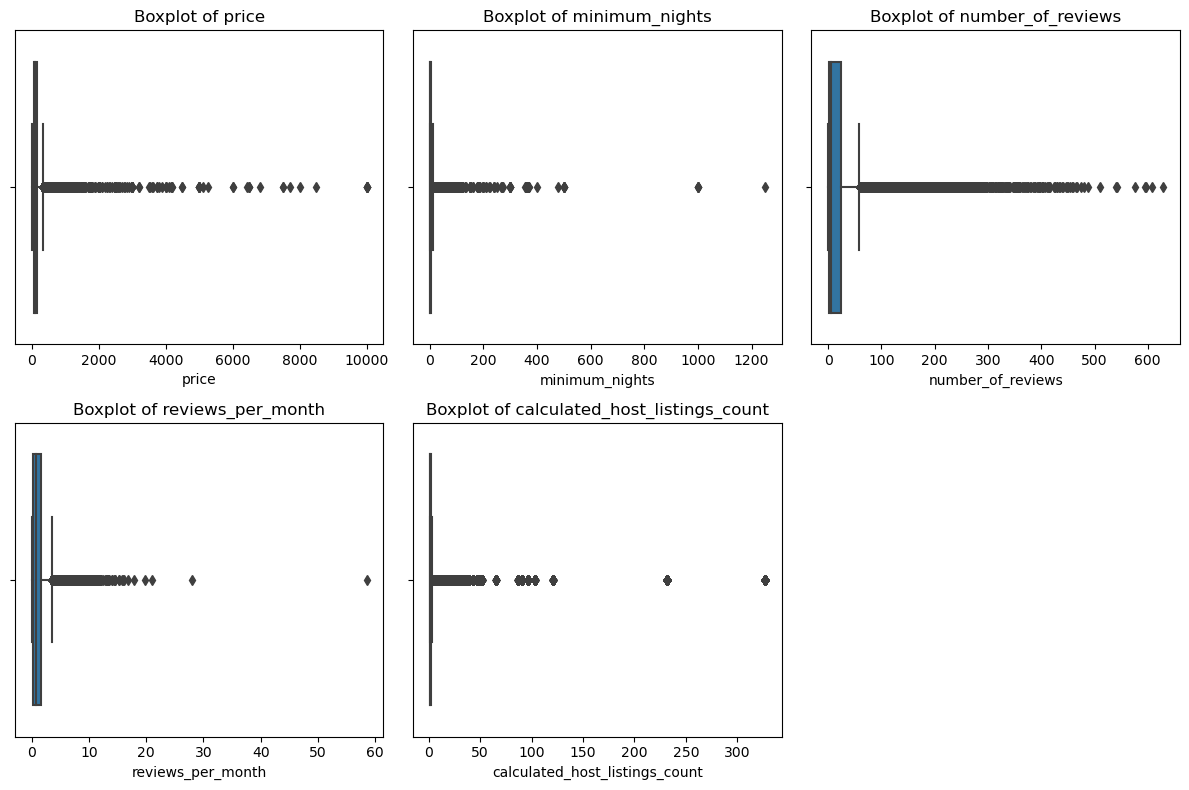

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

# List of numerical columns (ensure these are the columns you're analyzing)
numerical_cols = ['price', 'minimum_nights', 'number_of_reviews', 
                  'reviews_per_month', 'calculated_host_listings_count']

# Create boxplots for each numerical column
plt.figure(figsize=(12, 8))  # Set the figure size
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(2, 3, i)  # Create a grid of subplots (2 rows, 3 columns)
    sns.boxplot(data=df, x=col)  # Plot the boxplot
    plt.title(f'Boxplot of {col}')  # Title for each subplot

plt.tight_layout()  # Adjust the layout to prevent overlap
plt.show()


##### OUTLIER DETECTION AND REMOVAL FOR PRICE COLUMN

C:\Users\Hammed\AppData\Local\Temp\ipykernel_14308\1983343519.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['price'], bins=30, kde=True)


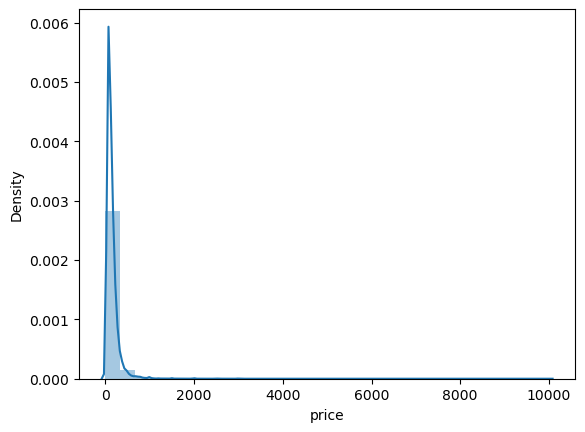

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.distplot(df['price'], bins=30, kde=True)
plt.show()

<Axes: >

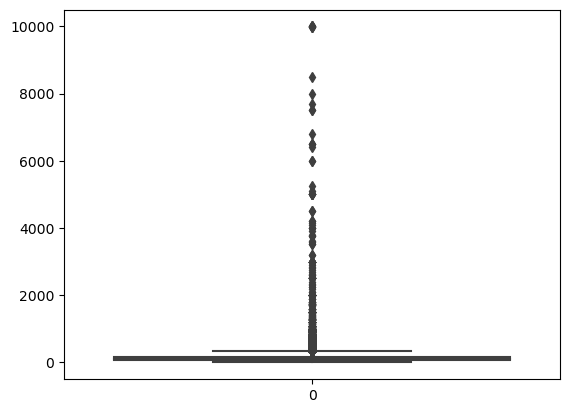

In [21]:
# view outlier clearly
sns.boxplot(df["price"])

In [22]:
# we will try different method to remove outliers tosee the one that best fit the column. some of which are 
# z-score, 

In [23]:
# Defining outlier threshold, while computing the mean and standard deviation.  

# find the limits. 
upper_limit = df["price"]. mean() + 3*df["price"].std()
lower_limit = df["price"]. mean() -3*df["price"].std()
print(upper_limit, lower_limit)

873.1831964283906 -567.7418220547329


In [24]:
# finding outliers values for price:

In [25]:
#display the outlier values 
df.loc[(df["price"]> upper_limit) | (df["price"] < lower_limit)] 

id                                               name    host_id  \
496      174966              Luxury 2Bed/2.5Bath Central Park View     836168   
762      273190          6 Bedroom Landmark West Village Townhouse     605463   
946      363673                   Beautiful 3 bedroom in Manhattan     256239   
1105     468613   $ (Phone number hidden by Airbnb) weeks - room f    2325861   
1414     634353                Luxury 1Bed with Central Park Views     836168   
...         ...                                                ...        ...   
48301  36186719           Private Bedroom in the Heart of Chelsea!  268920555   
48304  36189195      Next to Times Square/Javits/MSG! Amazing 1BR!  270214015   
48305  36189257             2BR Near Museum Mile! Upper East Side!  272166348   
48523  36308562  Tasteful & Trendy Brooklyn Brownstone, near Train  217732163   
48535  36311055     Stunning & Stylish Brooklyn Luxury, near Train  245712163   

           host_name neighbourhood_group       neighbourhood  latitude  \
496            Henry           Manhattan     Upper West Side  40.77350   
762     West Village           Manhattan        West Village  40.73301   
946           Tracey           Manhattan     Upper West Side  40.80142   
1105         Cynthia           Manhattan     Lower East Side  40.72152   
1414           Henry           Manhattan     Upper West Side  40.77428   
...              ...                 ...                 ...       ...   
48301  Terrence Jake           Manhattan             Chelsea  40.74531   
48304        Rogelio           Manhattan      Hell's Kitchen  40.75533   
48305    Mary Rotsen           Manhattan     Upper East Side  40.78132   
48523          Sandy            Brooklyn  Bedford-Stuyvesant  40.68767   
48535        Urvashi            Brooklyn  Bedford-Stuyvesant  40.68245   

       longitude        room_type  price  minimum_nights  number_of_reviews  \
496    -73.98697  Entire home/apt   2000              30                 30   
762    -74.00268  Entire home/apt   1300               5                 28   
946    -73.96931     Private room   3000               7                  0   
1105   -73.99279     Private room   1300               1                  0   
1414   -73.98594  Entire home/apt   1000              30                 44   
...          ...              ...    ...             ...                ...   
48301  -73.99454     Private room    999              30                  0   
48304  -73.99866  Entire home/apt   2999              30                  0   
48305  -73.95262  Entire home/apt   1999              30                  0   
48523  -73.95805  Entire home/apt   1369               1                  0   
48535  -73.93417  Entire home/apt   1749               1                  0   

      last_review  reviews_per_month  calculated_host_listings_count  \
496    2018-05-05               0.33                              11   
762    2018-09-25               0.31                               4   
946    no_ review               0.72                               1   
1105   no_ review               0.72                               1   
1414   2015-09-28               0.53                              11   
...           ...                ...                             ...   
48301  no_ review               0.72                               1   
48304  no_ review               0.72                               1   
48305  no_ review               0.72                               1   
48523  no_ review               0.72                               1   
48535  no_ review               0.72                               1   

       availability_365  
496                   0  
762                 297  
946                 365  
1105                  0  
1414                364  
...                 ...  
48301               270  
48304               222  
48305               270  
48523               349  
48535               303  

[388 rows x 16 columns]

In [26]:
new_df = df.loc[(df["price"] <= upper_limit) & (df["price"] >=  lower_limit)] 
print("old_data:", len(df))
print("new_data:", len(new_df))
print('outliers:', len(df)-len(new_df))

old_data: 48895
new_data: 48507
outliers: 388


<Axes: >

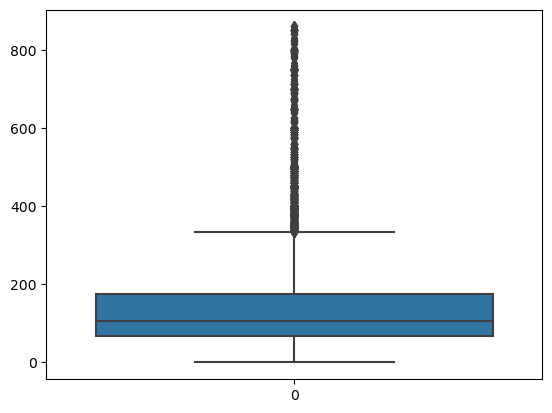

In [27]:
sns.boxplot(new_df['price'])

###### CAPPING METHOD - changing outlier values to upper or lower limit values. 

In [28]:
new_df.loc[(new_df['price']> upper_limit), 'price'] = upper_limit
new_df.loc[(new_df['price']< lower_limit), 'price'] = lower_limit

<Axes: >

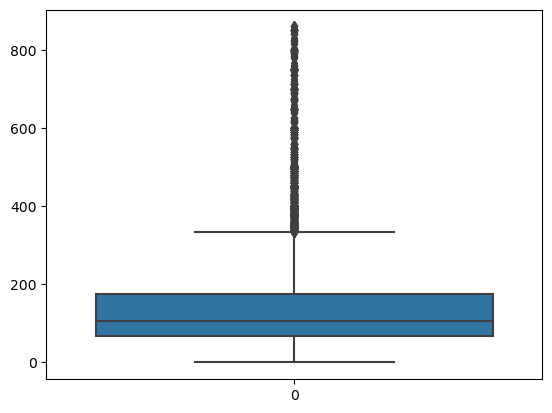

In [29]:
sns.boxplot(new_df['price'])

In [30]:
len(new_df)

48507

C:\Users\Hammed\AppData\Local\Temp\ipykernel_14308\2265666257.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_df['price'])


<Axes: xlabel='price', ylabel='Density'>

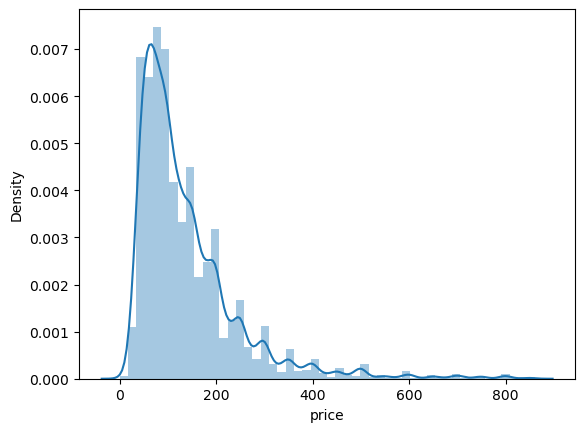

In [31]:
sns.distplot(new_df['price'])

In [32]:
# Identify numerical columns
numerical_cols = new_df.select_dtypes(include=['number']).columns


In [33]:
print(new_df[numerical_cols].skew())

id                                -0.090125
host_id                            1.207032
latitude                           0.242170
longitude                          1.281469
price                              2.449516
minimum_nights                    22.336587
number_of_reviews                  3.679972
reviews_per_month                  3.596062
calculated_host_listings_count     7.909199
availability_365                   0.770302
dtype: float64


##### 2,  INTERQUARTILE RANGE METHOD (IQR)

In [34]:
q1 = df['price']. quantile(0.25)
q3 = df['price']. quantile(0.75)
iqr = q3 - q1

In [35]:
print('q1:', q1, 'q3:', q3, iqr)

q1: 69.0 q3: 175.0 106.0


In [36]:
upper_limit = q3 +(1.5* iqr)
lower_limit = q1 -(1.5* iqr)
lower_limit, upper_limit

(-90.0, 334.0)

<Axes: >

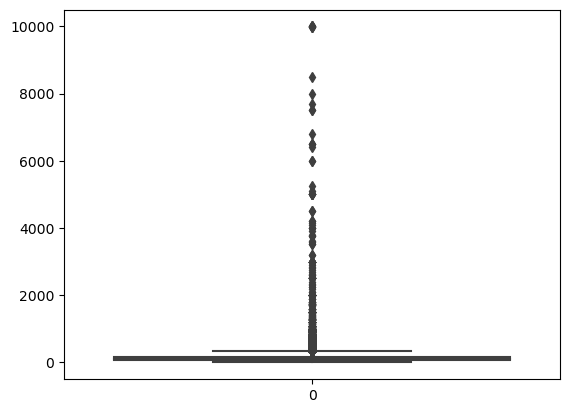

In [37]:
sns.boxplot(df['price'])

In [38]:
# Find outliers 
df.loc[(df["price"]> upper_limit) | (df["price"] < lower_limit)] 

id                                               name    host_id  \
61        15396                 Sunny & Spacious Chelsea Apartment      60278   
85        19601                perfect for a family or small group      74303   
103       23686  2000 SF 3br 2bath West Village private  townhouse      93790   
114       26933  2 BR / 2 Bath Duplex Apt with patio! East Village      72062   
121       27659                   3 Story Town House in Park Slope     119588   
...         ...                                                ...        ...   
48758  36420289    Rustic Garden House Apt, 2 stops from Manhattan   73211393   
48833  36450896   Brand New 3-Bed Apt in the Best Location of FiDi   29741813   
48839  36452721  Massage Spa. Stay overnight. Authors Artist dr...  274079964   
48842  36453160  LUXURY MANHATTAN PENTHOUSE+HUDSON RIVER+EMPIRE...  224171371   
48856  36457700  Large 3 bed, 2 bath , garden , bbq , all you need   66993395   

                     host_name neighbourhood_group       neighbourhood  \
61                       Petra           Manhattan             Chelsea   
85                      Maggie            Brooklyn    Brooklyn Heights   
103                        Ann           Manhattan        West Village   
114                      Bruce           Manhattan        East Village   
121                       Vero            Brooklyn         South Slope   
...                        ...                 ...                 ...   
48758                LaGabrell              Queens    Long Island City   
48833                      Yue           Manhattan  Financial District   
48839                  Richard            Brooklyn      Sheepshead Bay   
48842  LuxuryApartmentsByAmber           Manhattan             Chelsea   
48856                   Thomas            Brooklyn  Bedford-Stuyvesant   

       latitude  longitude        room_type  price  minimum_nights  \
61     40.74623  -73.99530  Entire home/apt    375             180   
85     40.69723  -73.99268  Entire home/apt    800               1   
103    40.73096  -74.00319  Entire home/apt    500               4   
114    40.72540  -73.98157  Entire home/apt    350               2   
121    40.66499  -73.97925  Entire home/apt    400               2   
...         ...        ...              ...    ...             ...   
48758  40.75508  -73.93258  Entire home/apt    350               2   
48833  40.70605  -74.01042  Entire home/apt    475               2   
48839  40.59866  -73.95661     Private room    800               1   
48842  40.75204  -74.00292  Entire home/apt    350               1   
48856  40.68886  -73.92879  Entire home/apt    345               4   

       number_of_reviews last_review  reviews_per_month  \
61                     5  2018-11-03               0.12   
85                    25  2016-08-04               0.24   
103                   46  2019-05-18               0.55   
114                    7  2017-08-09               0.06   
121                   16  2018-12-30               0.24   
...                  ...         ...                ...   
48758                  0  no_ review               0.72   
48833                  0  no_ review               0.72   
48839                  0  no_ review               0.72   
48842                  0  no_ review               0.72   
48856                  0  no_ review               0.72   

       calculated_host_listings_count  availability_365  
61                                  1               180  
85                                  1                 7  
103                                 2               243  
114                                 4               298  
121                                 2               216  
...                               ...               ...  
48758                               1               364  
48833                               1                64  
48839                               1                23  
48842                

In [39]:
### trim the data
new_df = df.loc[(df["price"] <= upper_limit) & (df["price"] >=  lower_limit)] 
print("old_data:", len(df))
print("new_data:", len(new_df))
print('outliers:', len(df)-len(new_df))

old_data: 48895
new_data: 45923
outliers: 2972


<Axes: >

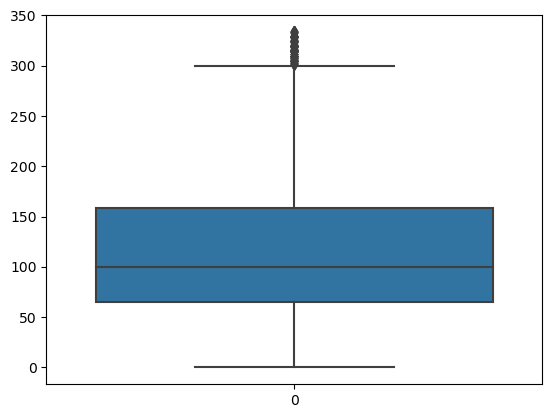

In [40]:
sns.boxplot(new_df['price'])

In [41]:
### capping 
new_df = df.copy()
new_df.loc[(new_df['price']> upper_limit), 'price'] = upper_limit
new_df.loc[(new_df['price']< lower_limit), 'price'] = lower_limit

<Axes: >

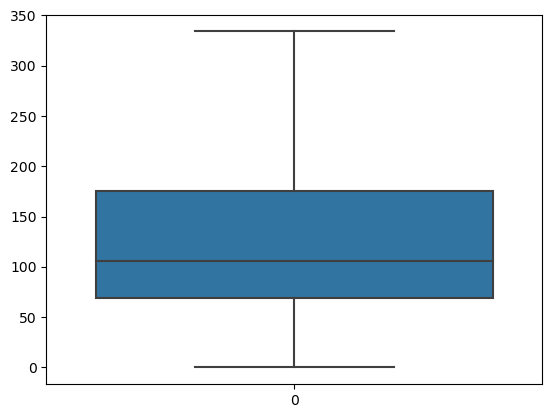

In [42]:
sns.boxplot(new_df['price'])

C:\Users\Hammed\AppData\Local\Temp\ipykernel_14308\2265666257.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_df['price'])


<Axes: xlabel='price', ylabel='Density'>

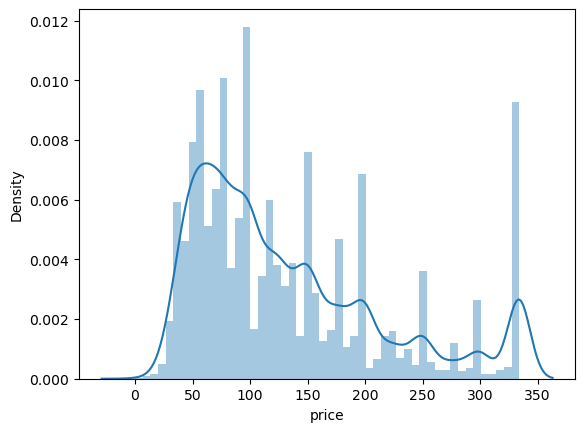

In [43]:
sns.distplot(new_df['price'])

###### 3. PERCENTILE METHOD


In [44]:
upper_limit = df['price'].quantile(0.99)
lower_limit = df['price'].quantile(0.001)
lower_limit, upper_limit

(18.0, 799.0)

<Axes: >

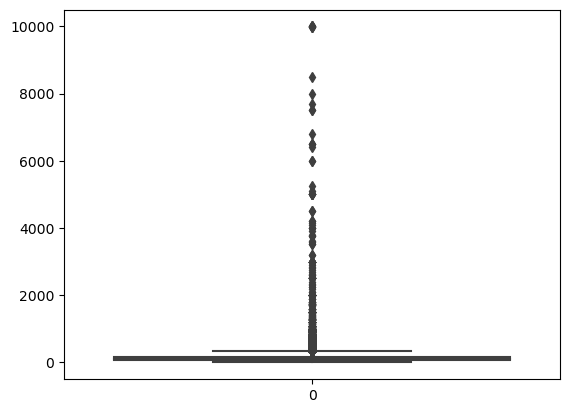

In [45]:
sns.boxplot(df['price'])

In [46]:
#find outliers 
df.loc[(df["price"]> upper_limit) | (df["price"] < lower_limit)] 

id                                               name    host_id  \
85        19601                perfect for a family or small group      74303   
496      174966              Luxury 2Bed/2.5Bath Central Park View     836168   
662      250801                 Heart & Soul of Greenwich Village     1314834   
762      273190          6 Bedroom Landmark West Village Townhouse     605463   
780      279857  #1 Yellow Block BnB/see at Net Flix Show Stay ...    1420300   
...         ...                                                ...        ...   
48305  36189257             2BR Near Museum Mile! Upper East Side!  272166348   
48486  36280646                       Cable and wfi, L/G included.  272872092   
48523  36308562  Tasteful & Trendy Brooklyn Brownstone, near Train  217732163   
48535  36311055     Stunning & Stylish Brooklyn Luxury, near Train  245712163   
48839  36452721  Massage Spa. Stay overnight. Authors Artist dr...  274079964   

          host_name neighbourhood_group       neighbourhood  latitude  \
85           Maggie            Brooklyn    Brooklyn Heights  40.69723   
496           Henry           Manhattan     Upper West Side  40.77350   
662           Rhona           Manhattan   Greenwich Village  40.73129   
762    West Village           Manhattan        West Village  40.73301   
780           Gordy            Brooklyn  Bedford-Stuyvesant  40.68492   
...             ...                 ...                 ...       ...   
48305   Mary Rotsen           Manhattan     Upper East Side  40.78132   
48486         Chris              Queens        Forest Hills  40.73657   
48523         Sandy            Brooklyn  Bedford-Stuyvesant  40.68767   
48535       Urvashi            Brooklyn  Bedford-Stuyvesant  40.68245   
48839       Richard            Brooklyn      Sheepshead Bay  40.59866   

       longitude        room_type  price  minimum_nights  number_of_reviews  \
85     -73.99268  Entire home/apt    800               1                 25   
496    -73.98697  Entire home/apt   2000              30                 30   
662    -73.99944  Entire home/apt    850               3                107   
762    -74.00268  Entire home/apt   1300               5                 28   
780    -73.95489  Entire home/apt    800               4                122   
...          ...              ...    ...             ...                ...   
48305  -73.95262  Entire home/apt   1999              30                  0   
48486  -73.85088  Entire home/apt     16               9                  1   
48523  -73.95805  Entire home/apt   1369               1                  0   
48535  -73.93417  Entire home/apt   1749               1                  0   
48839  -73.95661     Private room    800               1                  0   

      last_review  reviews_per_month  calculated_host_listings_count  \
85     2016-08-04               0.24                               1   
496    2018-05-05               0.33                              11   
662    2019-05-23               1.15                               1   
762    2018-09-25               0.31                               4   
780    2019-07-02               1.37                               1   
...           ...                ...                             ...   
48305  no_ review               0.72                               1   
48486  2019-07-07               1.00                               1   
48523  no_ review               0.72                               1   
48535  no_ review               0.72                               1   
48839  no_ review               0.72                               1   

       availability_365  
85                    7  
496                   0  
662                 249  
762                 297  
780                 257  
...                 ...  
48305               270  
48486               322  
48523               349  
48535               303  
48839                23  

[522 rows x 16 columns]

In [47]:
### trim to delete the outliers 
new_df = df.loc[(df["price"] <= upper_limit) & (df["price"] >=  lower_limit)] 
print("old_data:", len(df))
print("new_data:", len(new_df))
print('outliers:', len(df)-len(new_df))

old_data: 48895
new_data: 48373
outliers: 522


<Axes: >

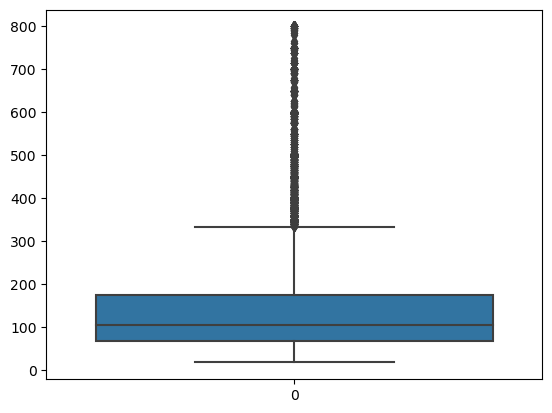

In [48]:
sns.boxplot(new_df['price'])

In [49]:
### capping 
new_df = df.copy()
new_df.loc[(new_df['price']> upper_limit), 'price'] = upper_limit
new_df.loc[(new_df['price']< lower_limit), 'price'] = lower_limit

<Axes: >

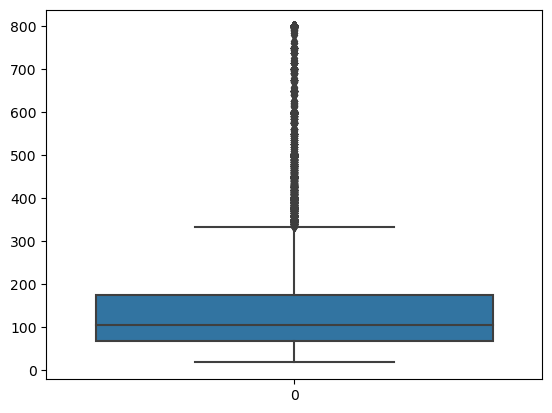

In [50]:
sns.boxplot(new_df['price'])

C:\Users\Hammed\AppData\Local\Temp\ipykernel_14308\2265666257.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_df['price'])


<Axes: xlabel='price', ylabel='Density'>

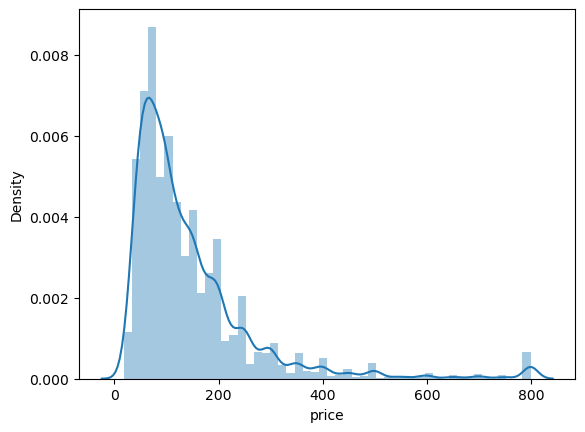

In [51]:
sns.distplot(new_df['price'])

C:\Users\Hammed\AppData\Local\Temp\ipykernel_14308\459039374.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['price'])


<Axes: xlabel='price', ylabel='Density'>

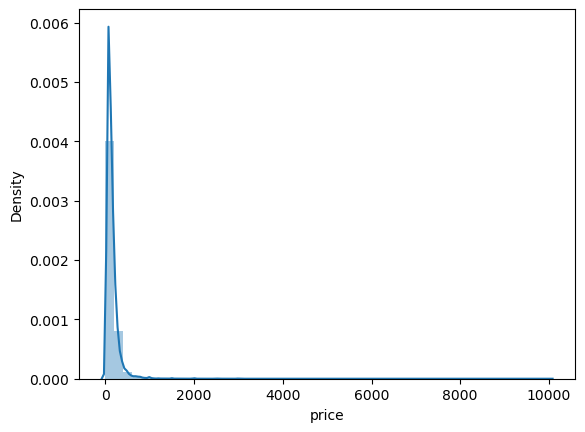

In [52]:
## displot from previos data 
sns.distplot(df['price'])

##### FOR MINIMUM_NIGHTS

In [54]:
df.describe()

##### WE APPLY SKEW TO SEE COLUMNS WITH EXTREEME VALUES/ OUTLIERS. 

# Identify numerical columns
numerical_cols = df.select_dtypes(include=['number']).columns

# Display summary statistics
print(df[numerical_cols].describe())


                 id       host_id      latitude     longitude         price  \
count  4.889500e+04  4.889500e+04  48895.000000  48895.000000  48895.000000   
mean   1.901714e+07  6.762001e+07     40.728949    -73.952170    152.720687   
std    1.098311e+07  7.861097e+07      0.054530      0.046157    240.154170   
min    2.539000e+03  2.438000e+03     40.499790    -74.244420      0.000000   
25%    9.471945e+06  7.822033e+06     40.690100    -73.983070     69.000000   
50%    1.967728e+07  3.079382e+07     40.723070    -73.955680    106.000000   
75%    2.915218e+07  1.074344e+08     40.763115    -73.936275    175.000000   
max    3.648724e+07  2.743213e+08     40.913060    -73.712990  10000.000000   

       minimum_nights  number_of_reviews  reviews_per_month  \
count    48895.000000       48895.000000       48895.000000   
mean         7.029962          23.274466           1.238930   
std         20.510550          44.550582           1.520861   
min          1.000000           0.00

In [58]:
#  skew data 
print(df[numerical_cols].skew())

#how we measure skewness 

#Skewness = 0:  Data is perfectly symmetric (normal distribution).
#Skewness > 0:  Data is right-skewed (long tail on the right, high-value outliers).
#Skewness < 0:  Data is left-skewed (long tail on the left, low-value outliers).
#Skewness > 2:  Data is highly skewed, suggesting extreme outliers.


#In this case, host_id, id, availability_365, latitude, longitude have limited or few outliers comapred to price (23.673594),minimum_nights (27.542187), number_of_reviews (3.690635), reviews_per_month (3.300723),  calculated_host_listings_count (7.933174)






id                                -0.090257
host_id                            1.206214
latitude                           0.237167
longitude                          1.284210
price                             19.118939
minimum_nights                    21.827275
number_of_reviews                  3.690635
reviews_per_month                  3.603699
calculated_host_listings_count     7.933174
availability_365                   0.763408
dtype: float64


C:\Users\Hammed\AppData\Local\Temp\ipykernel_14308\2632377786.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['minimum_nights'], bins=30, kde=True)


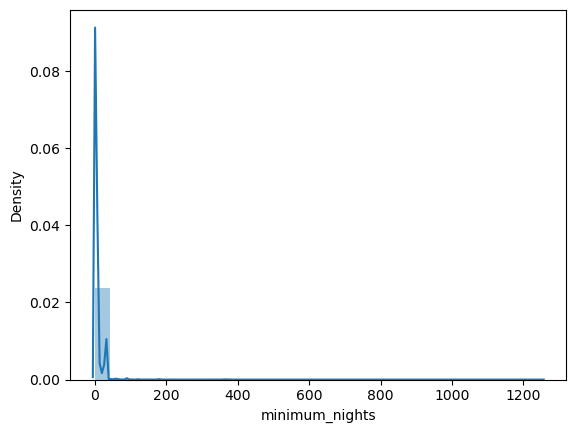

In [59]:
##### OUTLIER DETECTION AND REMOVAL FOR PRICE COLUMN

import seaborn as sns
import matplotlib.pyplot as plt
sns.distplot(df['minimum_nights'], bins=30, kde=True)
plt.show()


<Axes: >

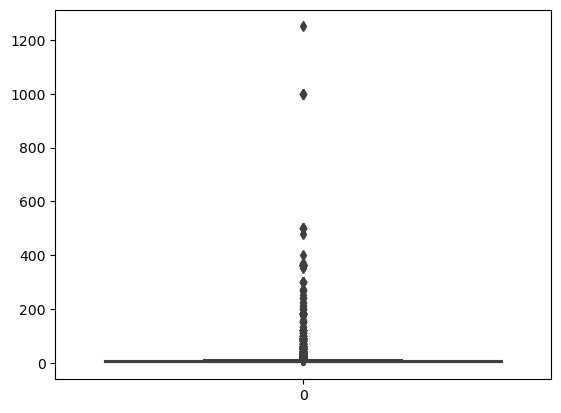

In [60]:
# view outlier clearly
sns.boxplot(df["minimum_nights"])

# we will try different method to remove outliers tosee the one that best fit the column. some of which are 
# z-score, 


In [ ]:
#### Z-SCORE METHOD

# Defining outlier threshold, while computing the mean and standard deviation.  

# find the limits. 
upper_limit = df_1["minimum_nights"]. mean() + 3*df_1["minimum_nights"].std()
lower_limit = df_1["minimum_nights"]. mean() -3*df_1["minimum_nights"].std()
print(upper_limit, lower_limit)

In [ ]:
# finding outliers values for price:

df_1.loc[(df_1["minimum_nights"]> upper_limit) | (df_1["minimum_nights"] < lower_limit)] 

new_df = df_1.loc[(df_1["minimum_nights"] <= upper_limit) & (df_1["minimum_nights"] >=  lower_limit)] 
print("old_data:", len(df_1))
print("new_data:", len(new_df))
print('outliers:', len(df_1)-len(new_df))

In [ ]:
sns.boxplot(new_df['minimum_nights'])

In [ ]:
###### CAPPING METHOD - changing outlier values to upper or lower limit values. 

new_df = df_1.copy()
new_df.loc[(new_df['minimum_nights']> upper_limit), 'minimum_nights'] = upper_limit
new_df.loc[(new_df['minimum_nights']< lower_limit), 'minimum_nights'] = lower_limit

In [ ]:
sns.boxplot(new_df['minimum_nights'])

In [ ]:
len(new_df)

In [ ]:
##### 2,  INTERQUARTILE RANGE METHOD (IQR)

q1 = df_1['minimum_nights']. quantile(0.25)
q3 = df_1['minimum_nights']. quantile(0.75)
iqr = q3 - q1

print('q1:', q1, 'q3:', q3, iqr)

In [ ]:
upper_limit = q3 +(1.5* iqr)
lower_limit = q1 -(1.5* iqr)
lower_limit, upper_limit

In [ ]:
sns.boxplot(df_1['minimum_nights'])

In [ ]:
# Find outliers 
df_1.loc[(df_1["minimum_nights"]> upper_limit) | (df_1["minimum_nights"] < lower_limit)]

In [ ]:
### trim the data
new_df = df_1.loc[(df_1["minimum_nights"] <= upper_limit) & (df_1["minimum_nights"] >=  lower_limit)] 
print("old_data:", len(df_1))
print("new_data:", len(new_df))
print('outliers:', len(df_1)-len(new_df))

In [ ]:
sns.boxplot(new_df['minimum_nights'])

In [ ]:
### capping 
new_df = df_1.copy()
new_df.loc[(new_df['minimum_nights']> upper_limit), 'minimum_nights'] = upper_limit
new_df.loc[(new_df['minimum_nights']< lower_limit), 'minimum_nights'] = lower_limit

In [ ]:
sns.boxplot(new_df['minimum_nights'])

In [ ]:
###### 3. PERCENTILE METHOD


upper_limit = df_1['minimum_nights'].quantile(0.99)
lower_limit = df_1['minimum_nights'].quantile(0.001)
lower_limit, upper_limit

In [ ]:
sns.boxplot(df_1['minimum_nights'])

In [ ]:
#find outliers 
df_1.loc[(df_1["minimum_nights"]> upper_limit) | (df_1["minimum_nights"] < lower_limit)] 

In [ ]:
### trim to delete the outliers 
new_df = df_1.loc[(df_1["minimum_nights"] <= upper_limit) & (df_1["minimum_nights"] >=  lower_limit)] 
print("old_data:", len(df_1))
print("new_data:", len(new_df))
print('outliers:', len(df_1)-len(new_df))

In [ ]:
sns.boxplot(new_df['minimum_nights'])

In [ ]:
### capping 
new_df = df_1.copy()
new_df.loc[(new_df['minimum_nights']> upper_limit), 'minimum_nights'] = upper_limit
new_df.loc[(new_df['minimum_nights']< lower_limit), 'minimum_nights'] = lower_limit


In [ ]:
sns.boxplot(new_df['minimum_nights'])

In [ ]:
sns.distplot(new_df['minimum_nights'])

In [ ]:
## displot from previos data 
sns.distplot(df_1['minimum_nights'])

#### Z-SCORE METHOD new method 

In [ ]:
import pandas as pd
from scipy.stats import zscore

# Function to remove outliers using Z-score
def remove_outliers_zscore(df, columns, threshold=3):
    for col in columns:
        df[col + '_zscore'] = zscore(df[col])
        df = df[df[col + '_zscore'].abs() <= threshold]
        df.drop(columns=[col + '_zscore'], inplace=True)  # Drop the Z-score column after filtering
    return df

# Assuming df is the DataFrame containing your data
skewed_columns = ['price', 'minimum_nights', 'number_of_reviews', 
                  'reviews_per_month', 'calculated_host_listings_count']

# Remove outliers using Z-score method
df_cleaned_zscore = remove_outliers_zscore(df, skewed_columns)

# Final cleaned dataframe after Z-score removal
print(df_cleaned_zscore)


In [ ]:
df_cleaned_zscore.head()

In [ ]:
# Check for skewness after removing outliers using Z-score method
skewness_after_zscore = df_cleaned_zscore[skewed_columns].skew()

# Print the skewness of the columns
print(skewness_after_zscore)


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# List of numerical columns (ensure these are the columns you're analyzing)
numerical_cols = ['price', 'minimum_nights', 'number_of_reviews', 
                  'reviews_per_month', 'calculated_host_listings_count']

# Create boxplots for each numerical column in the cleaned dataframe (df_cleaned_zscore)
plt.figure(figsize=(12, 8))  # Set the figure size
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(2, 3, i)  # Create a grid of subplots (2 rows, 3 columns)
    sns.boxplot(data=df_cleaned_zscore, x=col)  # Plot the boxplot
    plt.title(f'Boxplot of {col}')  # Title for each subplot

plt.tight_layout()  # Adjust the layout to prevent overlap
plt.show()


In [ ]:
### BEGINING OF GOOD ONE IQR METHOD 

In [ ]:
import pandas as pd

# Function to cap (trim) outliers using IQR
def cap_outliers_iqr(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Cap values outside the IQR range
        df[col] = df[col].clip(lower=lower_bound, upper=upper_bound)
    
    return df

# Assuming df is the DataFrame containing your data
skewed_columns = ['price', 'minimum_nights', 'number_of_reviews', 
                  'reviews_per_month', 'calculated_host_listings_count']

# Cap outliers using the IQR method
df_capped = cap_outliers_iqr(df, skewed_columns)

# Final dataframe after capping the outliers
print(df_capped)


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# List of numerical columns (ensure these are the columns you're analyzing)
numerical_cols = ['price', 'minimum_nights', 'number_of_reviews', 
                  'reviews_per_month', 'calculated_host_listings_count']

# Create boxplots for each numerical column
plt.figure(figsize=(12, 8))  # Set the figure size
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(2, 3, i)  # Create a grid of subplots (2 rows, 3 columns)
    sns.boxplot(data=df, x=col)  # Plot the boxplot
    plt.title(f'Boxplot of {col}')  # Title for each subplot

plt.tight_layout()  # Adjust the layout to prevent overlap
plt.show()


In [ ]:
print(df[numerical_cols].skew())

In [ ]:
df_capped.head()

In [ ]:
df.head()

In [ ]:
df_capped.info()

In [ ]:
df.describe()

In [ ]:
df_capped.describe()

In [ ]:
#####ENDING OF GOOD ONE 

import matplotlib.pyplot as plt
import seaborn as sns

# Select all numerical columns
numerical_cols = df.select_dtypes(include=['number']).columns

# Set up figure size
plt.figure(figsize=(15, 8))

# Create boxplots for each numerical column
df[numerical_cols].boxplot(rot=90)  # Rotate labels for better visibility
plt.title("Boxplot of All Numerical Columns (Before Outlier Removal)")
plt.show()


# Remove outliers using IQR Method. 

def remove_outliers_iqr(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)  # 25th percentile
        Q3 = df[col].quantile(0.75)  # 75th percentile
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Remove outliers
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    
    return df

# Apply outlier removal to all numerical columns
df_cleaned = remove_outliers_iqr(df, numerical_cols)

# Display shape before and after outlier removal
print(f"Original dataset shape: {df.shape}")
print(f"Cleaned dataset shape: {df_cleaned.shape}")


 The dataset has been reduced from 48895 to 22888. 

plt.figure(figsize=(15, 8))
df_cleaned[numerical_cols].boxplot(rot=90)
plt.title("Boxplot of All Numerical Columns (After Outlier Removal)")
plt.show()


df_cleaned.info()

df_cleaned.head()

df_cleaned.isnull().sum()

df_cleaned.info()

df_cleaned. describe()

# Calculate IQR for 'price'
Q1_price = df_cleaned['price'].quantile(0.25)
Q3_price = df_cleaned['price'].quantile(0.75)
IQR_price = Q3_price - Q1_price

lower_bound_price = Q1_price - 1.5 * IQR_price
upper_bound_price = Q3_price + 1.5 * IQR_price

# Identify outliers in 'price'
outliers_price = df_cleaned[(df_cleaned['price'] < lower_bound_price) | (df_cleaned['price'] > upper_bound_price)]

len(outliers_price)


# Calculate IQR for 'minimum_nights'
Q1_nights = df_cleaned['minimum_nights'].quantile(0.25)
Q3_nights = df_cleaned['minimum_nights'].quantile(0.75)
IQR_nights = Q3_nights - Q1_nights

lower_bound_nights = Q1_nights - 1.5 * IQR_nights
upper_bound_nights = Q3_nights + 1.5 * IQR_nights

# Identify outliers in 'minimum_nights'
outliers_nights = df_cleaned[
    (df_cleaned['minimum_nights'] < lower_bound_nights) | 
    (df_cleaned['minimum_nights'] > upper_bound_nights)
]

# Number of outliers detected
num_outliers_nights = len(outliers_nights)

print(f"Number of outliers in 'minimum_nights': {num_outliers_nights}")


Summary of Outliers Detected Using IQR Method
Price (price)
25th Percentile (Q1): $69
75th Percentile (Q3): $175
Interquartile Range (IQR): $106
Lower Bound: -$90 (not meaningful since prices can't be negative)
Upper Bound: $334
Minimum Price: $0
Maximum Price: $10,000
Outliers Count: 2,972 (values above $334 are flagged as outliers)
Minimum Nights (minimum_nights)
25th Percentile (Q1): 1 night
75th Percentile (Q3): 5 nights
Interquartile Range (IQR): 4 nights
Lower Bound: -5 (not meaningful)
Upper Bound: 11
Minimum Nights: 1
Maximum Nights: 1,250 (extreme outlier)
Outliers Count: 6,607 (values above 11 nights are flagged as outliers)


from scipy import stats
from sklearn.ensemble import IsolationForest

# --- Z-SCORE METHOD ---
z_scores_price = stats.zscore(df_cleaned['price'])
z_scores_nights = stats.zscore(df_cleaned['minimum_nights'])

# Define threshold (common choice: |Z| > 3)
z_threshold = 3
outliers_price_z = df_cleaned[abs(z_scores_price) > z_threshold]
outliers_nights_z = df_cleaned[abs(z_scores_nights) > z_threshold]

# --- ISOLATION FOREST METHOD ---
iso = IsolationForest(contamination=0.05, random_state=42)  # Assuming 5% contamination
df_cleaned['outlier_price_iso'] = iso.fit_predict(df_cleaned[['price']])
df_cleaned['outlier_nights_iso'] = iso.fit_predict(df_cleaned[['minimum_nights']])

outliers_price_iso = df_cleaned[df_cleaned['outlier_price_iso'] == -1]
outliers_nights_iso = df_cleaned[df_cleaned['outlier_nights_iso'] == -1]

# Outlier counts
outlier_counts = {
    "IQR (price)": len(outliers_price),
    "Z-score (price)": len(outliers_price_z),
    "Isolation Forest (price)": len(outliers_price_iso),
    "IQR (nights)": len(outliers_nights),
    "Z-score (nights)": len(outliers_nights_z),
    "Isolation Forest (nights)": len(outliers_nights_iso),
}

print(outlier_counts)


Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['price'] < lower_bound) | (df['price'] > upper_bound)]
print(f"Number of price outliers: {len(outliers)}")


# Check for skewness (high skewness suggests potential outliers)
print(df_cleaned[numerical_cols].skew())